# Feature Engineering and Modelling

---

1. Import packages
2. Load data
3. Modelling

---

## 1. Import packages

In [3]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---
## 2. Load data

In [5]:
df = pd.read_csv('./data_for_predictions.csv')
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0,0.444045,0.114481,0.098142,40.606701,...,2,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0,1.237292,0.145711,0.000000,44.311378,...,76,4,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0,1.599009,0.165794,0.087899,44.311378,...,68,8,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0,1.318689,0.146694,0.000000,44.311378,...,69,9,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0,2.122969,0.116900,0.100015,40.606701,...,71,9,1,0,0,0,0,1,0,0


---

## 3. Modelling

We now have a dataset containing features that we have engineered and we are ready to start training a predictive model. Remember, we only need to focus on training a `Random Forest` classifier.

In [6]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

### Data sampling

The first thing we want to do is split our dataset into training and test samples. The reason why we do this, is so that we can simulate a real life situation by generating predictions for our test sample, without showing the predictive model these data points. This gives us the ability to see how well our model is able to generalise to new data, which is critical.

A typical % to dedicate to testing is between 20-30, for this example we will use a 75-25% split between train and test respectively.

In [7]:
# Make a copy of our data
train_df = df.copy()

# Separate target variable from independent variables
y = df['churn']
X = df.drop(columns=['id', 'churn'])
print(X.shape)
print(y.shape)

(14606, 61)
(14606,)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10954, 61)
(10954,)
(3652, 61)
(3652,)


### Model training

Once again, we are using a `Random Forest` classifier in this example. A Random Forest sits within the category of `ensemble` algorithms because internally the `Forest` refers to a collection of `Decision Trees` which are tree-based learning algorithms. As the data scientist, you can control how large the forest is (that is, how many decision trees you want to include).

The reason why an `ensemble` algorithm is powerful is because of the laws of averaging, weak learners and the central limit theorem. If we take a single decision tree and give it a sample of data and some parameters, it will learn patterns from the data. It may be overfit or it may be underfit, but that is now our only hope, that single algorithm. 

With `ensemble` methods, instead of banking on 1 single trained model, we can train 1000's of decision trees, all using different splits of the data and learning different patterns. It would be like asking 1000 people to all learn how to code. You would end up with 1000 people with different answers, methods and styles! The weak learner notion applies here too, it has been found that if you train your learners not to overfit, but to learn weak patterns within the data and you have a lot of these weak learners, together they come together to form a highly predictive pool of knowledge! This is a real life application of many brains are better than 1.

Now instead of relying on 1 single decision tree for prediction, the random forest puts it to the overall views of the entire collection of decision trees. Some ensemble algorithms using a voting approach to decide which prediction is best, others using averaging. 

As we increase the number of learners, the idea is that the random forest's performance should converge to its best possible solution.

Some additional advantages of the random forest classifier include:

- The random forest uses a rule-based approach instead of a distance calculation and so features do not need to be scaled
- It is able to handle non-linear parameters better than linear based models

On the flip side, some disadvantages of the random forest classifier include:

- The computational power needed to train a random forest on a large dataset is high, since we need to build a whole ensemble of estimators.
- Training time can be longer due to the increased complexity and size of thee ensemble

In [9]:
# Add model training in here!
model = RandomForestClassifier(n_estimators = 100, class_weight='balanced', random_state=42) # Add parameters to the model!
model.fit(X_train, y_train) # Complete this method call!

RandomForestClassifier(class_weight='balanced', random_state=42)

### Evaluation

Now let's evaluate how well this trained model is able to predict the values of the test dataset.

In [10]:
# Generate predictions here!
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9033406352683461
Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95      3286
           1       0.81      0.05      0.09       366

    accuracy                           0.90      3652
   macro avg       0.86      0.52      0.52      3652
weighted avg       0.89      0.90      0.86      3652



In [11]:
#using confusion matrix
y_probs = model.predict_proba(X_test)
y_pred_custom = (y_probs[:, 1] > 0.3).astype(int) #lowered threshold to 0.3

from sklearn.metrics import confusion_matrix

print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_custom))
print("Classification Report:\n", classification_report(y_test, y_pred_custom))

Confusion Matrix: 
 [[3218   68]
 [ 314   52]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      3286
           1       0.43      0.14      0.21       366

    accuracy                           0.90      3652
   macro avg       0.67      0.56      0.58      3652
weighted avg       0.86      0.90      0.87      3652



In [12]:
#applying smote
!pip install imbalanced-learn

In [13]:
from imblearn.over_sampling import SMOTE


# Before applying SMOTE
print("Before SMOTE:", X_train.shape, y_train.value_counts())

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# After applying SMOTE
print("After SMOTE:", X_train_smote.shape, y_train_smote.value_counts())


Before SMOTE: (10954, 61) churn
0    9901
1    1053
Name: count, dtype: int64
After SMOTE: (19802, 61) churn
1    9901
0    9901
Name: count, dtype: int64


In [14]:
model.fit(X_train_smote, y_train_smote)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [15]:
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print("Confusion matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))


Confusion matrix: 
 [[3257   29]
 [ 332   34]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      3286
           1       0.54      0.09      0.16       366

    accuracy                           0.90      3652
   macro avg       0.72      0.54      0.55      3652
weighted avg       0.87      0.90      0.87      3652



In [16]:
## We can reduce the treshold to reduce the recall.

In [20]:
# Calculate performance metrics here!
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

accuracy = accuracy_score(y_test, y_pred_custom)
recall = recall_score(y_test, y_pred_custom)
precision = precision_score(y_test, y_pred_custom)
f1 = f1_score(y_test, y_pred_custom)

print(f"Accuracy: {accuracy}") 
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 score: {f1}")


Accuracy: 0.8953997809419496
Recall: 0.14207650273224043
Precision: 0.43333333333333335
F1 score: 0.2139917695473251


In [21]:
# It has high accuracy but can be misleading due to imbalanced dataset
# Recall value is very low
# 43% precision is not good but also not bad
# F1 score is also not good due to low recall value


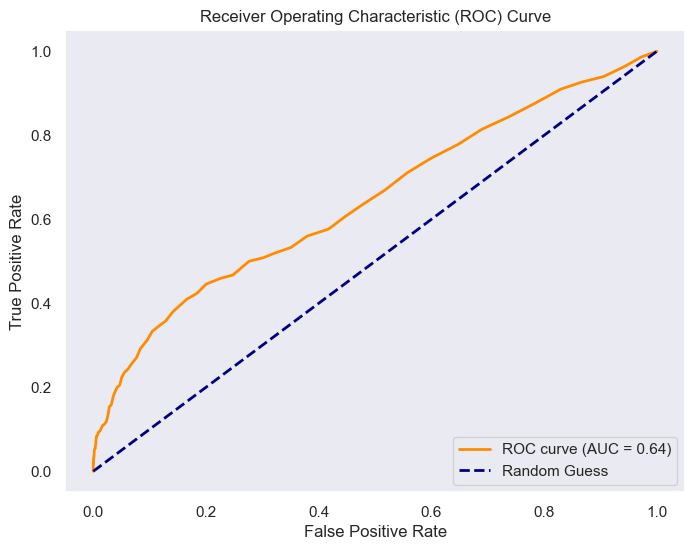

In [23]:
#plotting ROC and PR curves to improve recall value

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities
y_probs = model.predict_proba(X_test)[:, 1]

# Calculate FPR, TPR for ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


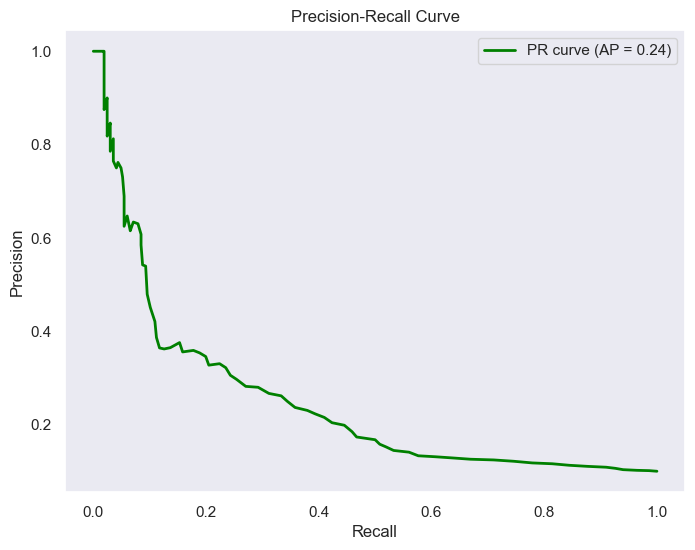

In [24]:
# PR Curve

from sklearn.metrics import precision_recall_curve, average_precision_score

# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
avg_precision = average_precision_score(y_test, y_probs)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', lw=2, label=f'PR curve (AP = {avg_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.grid()
plt.show()
